# Demo of the underlying task framework

Note, this is not for producing training/test data, but rather to understand the underlying mechanics of task (and to visualize the task)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import gcog.task.stim_generator as stim
import gcog.task.task_generator as taskgen
import gcog.task.config as config
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import warnings
warnings.filterwarnings("ignore") # runtime warning from graphviz
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Print the list of operators included in the task

Note, global properties of tasks are included in `gcog.task.config.py`

In [8]:
print('All task operations:', config.ALL_TASK_OPS)
print('All colors:', config.ALL_COLORS)
print('All shapes:', config.ALL_SHAPES)

All task operations: ['exist', 'go', 'getcolor', 'getshape', 'sumeven', 'producteven', 'productodd', 'sumodd']
All colors: ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'white', 'pink', 'cyan', 'brown']
All shapes: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


# 1. A single operator (controlled by min_depth parameter)
* The way to implement this task is by traversing the task graph (or tree) from top-to-bottom.
* The if-then clause is interpreted as: If the statement above the if-then clause is true, then traverse down the left-hand side. If it's false, traverse down the right-hand side.

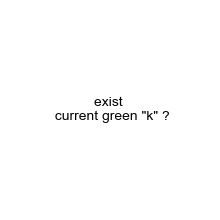

In [9]:
whens = config.ALL_TIME
task_graph = taskgen.TaskGraph(whens=whens,
                               starting_operators=['exist'],# config.STARTING_OPS,
                               ending_operators=config.ENDING_OPS,
                               min_depth=1)
plt.figure(figsize=(2,2))
task_graph.plot_graph()
plt.tight_layout()


## Generate an image that satifies this task graph

Instruction: current green k exist ?
Target output: True


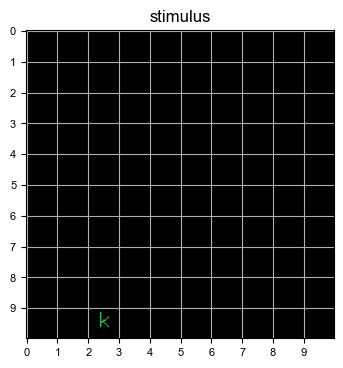

In [10]:
max_distractors = 1 # This is a variable that changes the number of 'distractor objects' in the image

task_ex = taskgen.MetaTask(task_graph)
objset = task_ex.generate_objset(n_distractor=max_distractors)
targets = task_ex.get_target(objset)

print('Instruction:', task_ex)
print('Target output:', targets[0])
img_array = objset.create_img()

plt.figure(figsize=(4,4))
plt.title('stimulus',fontsize=12,fontname='Arial')
plt.imshow(np.asarray(img_array[:,:,:,0],dtype='int16'))
plt.grid()
plt.xticks(np.arange(0,200,20),np.arange(0,10),fontsize=8,fontname='Arial');
plt.yticks(np.arange(0,200,20),np.arange(0,10),fontsize=8,fontname='Arial');
# plt.savefig(figurename + '_stimuli.png',transparent=True,dpi=300)

## Generate an image that satifies this task graph, but add more distractors

Instruction: current green k exist ?
Target output: False


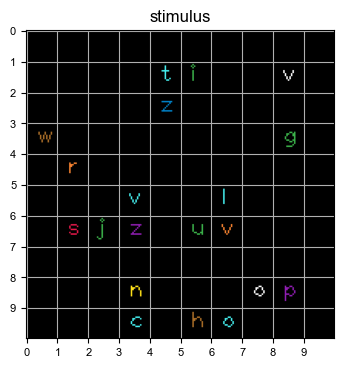

In [11]:
max_distractors = 20

task_ex = taskgen.MetaTask(task_graph)
objset = task_ex.generate_objset(n_distractor=max_distractors)
targets = task_ex.get_target(objset)

print('Instruction:', task_ex)
print('Target output:', targets[0])
img_array = objset.create_img()

plt.figure(figsize=(4,4))
plt.title('stimulus',fontsize=12,fontname='Arial')
plt.imshow(np.asarray(img_array[:,:,:,0],dtype='int16'))
plt.grid()
plt.xticks(np.arange(0,200,20),np.arange(0,10),fontsize=8,fontname='Arial');
plt.yticks(np.arange(0,200,20),np.arange(0,10),fontsize=8,fontname='Arial');
# plt.savefig(figurename + '_stimuli.png',transparent=True,dpi=300)

# 2. 1 if-then clauses (controlled by min_depth parameter)
* The way to implement this task is by traversing the task graph (or tree) from top-to-bottom.
* The if-then clause is interpreted as: If the statement above the if-then clause is true, then traverse down the left-hand side. If it's false, traverse down the right-hand side.

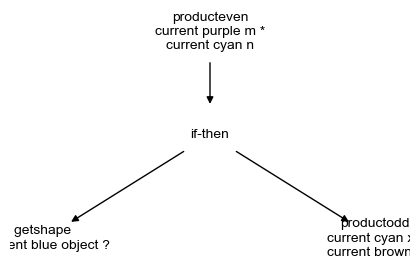

In [13]:
task_graph = taskgen.TaskGraph(starting_operators=config.STARTING_OPS,
                               ending_operators=config.ENDING_OPS,
                               min_depth=3)
plt.figure

plt.figure(figsize=(4,2.5))
task_graph.plot_graph()
plt.tight_layout()

## Generate an image that satifies this task graph

Instruction: [ if current purple m * current cyan n product is even , then shape of current blue object , else current cyan x * current brown a product is odd ]
Target output: False


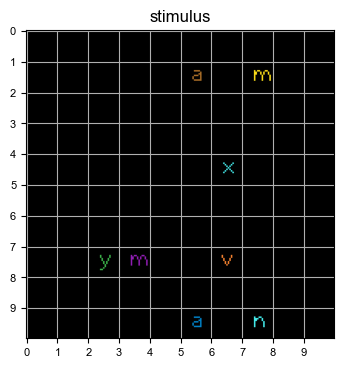

In [14]:
max_distractors = 3

task_ex = taskgen.MetaTask(task_graph)
objset = task_ex.generate_objset(n_distractor=max_distractors)
targets = task_ex.get_target(objset)

print('Instruction:', task_ex)
print('Target output:', targets[0])
img_array = objset.create_img()

plt.figure(figsize=(4,4))
plt.title('stimulus',fontsize=12,fontname='Arial')
plt.imshow(np.asarray(img_array[:,:,:,0],dtype='int16'))
plt.grid()
plt.xticks(np.arange(0,200,20),np.arange(0,10),fontsize=8,fontname='Arial');
plt.yticks(np.arange(0,200,20),np.arange(0,10),fontsize=8,fontname='Arial');
# plt.savefig(figurename + '_stimuli.png',transparent=True,dpi=300)

## Generate an image that satifies this task graph, but add more distractors

Instruction: [ if current purple m * current cyan n product is even , then shape of current blue object , else current cyan x * current brown a product is odd ]
Target output: a


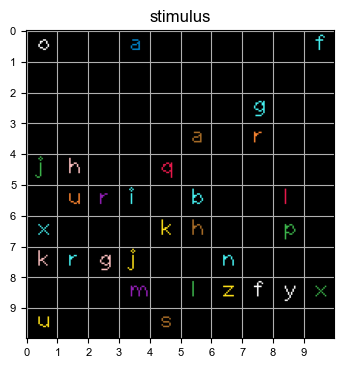

In [15]:
max_distractors=30

task_ex = taskgen.MetaTask(task_graph)
objset = task_ex.generate_objset(n_distractor=max_distractors)
targets = task_ex.get_target(objset)

print('Instruction:', task_ex)
print('Target output:', targets[0])
img_array = objset.create_img()

plt.figure(figsize=(4,4))
plt.title('stimulus',fontsize=12,fontname='Arial')
plt.imshow(np.asarray(img_array[:,:,:,0],dtype='int16'))
plt.grid()
plt.xticks(np.arange(0,200,20),np.arange(0,10),fontsize=8,fontname='Arial');
plt.yticks(np.arange(0,200,20),np.arange(0,10),fontsize=8,fontname='Arial');
# plt.savefig(figurename + '_stimuli.png',transparent=True,dpi=300)

# 3. Two if-then clauses (controlled by min_depth parameter)

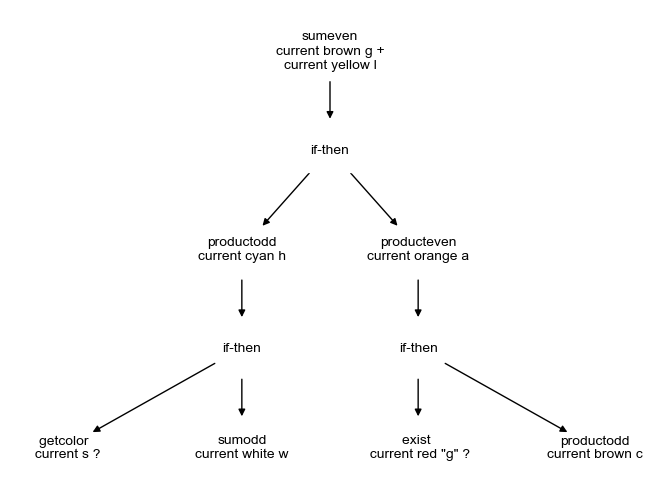

In [16]:
task_graph = taskgen.TaskGraph(starting_operators=config.STARTING_OPS,
                               ending_operators=config.ENDING_OPS,
                               min_depth=5)
task_graph.plot_graph()
plt.tight_layout()

## Generate an image that satifies this task graph

Instruction: [ if current brown g + current yellow l sum is even , then [ if current cyan h product is odd , then color of current s , else current white w sum is odd ] , else [ if current orange a product is even , then current red g exist , else current brown c product is odd ] ]
Target output: True


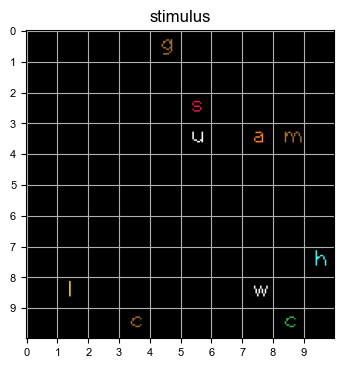

In [17]:
max_distractors = 3

task_ex = taskgen.MetaTask(task_graph)
objset = task_ex.generate_objset(n_distractor=max_distractors)
targets = task_ex.get_target(objset)

print('Instruction:', task_ex)
print('Target output:', targets[0])
img_array = objset.create_img()

plt.figure(figsize=(4,4))
plt.title('stimulus',fontsize=12,fontname='Arial')
plt.imshow(np.asarray(img_array[:,:,:,0],dtype='int16'))
plt.grid()
plt.xticks(np.arange(0,200,20),np.arange(0,10),fontsize=8,fontname='Arial');
plt.yticks(np.arange(0,200,20),np.arange(0,10),fontsize=8,fontname='Arial');
# plt.savefig(figurename + '_stimuli.png',transparent=True,dpi=300)

## Generate an image that satifies this task graph, but add more distractors

Instruction: [ if current brown g + current yellow l sum is even , then [ if current cyan h product is odd , then color of current s , else current white w sum is odd ] , else [ if current orange a product is even , then current red g exist , else current brown c product is odd ] ]
Target output: True


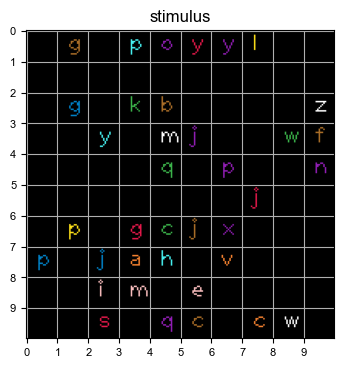

In [18]:
max_distractors = 30
task_ex = taskgen.MetaTask(task_graph)
objset = task_ex.generate_objset(n_distractor=max_distractors)
targets = task_ex.get_target(objset)

print('Instruction:', task_ex)
print('Target output:', targets[0])
img_array = objset.create_img()

plt.figure(figsize=(4,4))
plt.title('stimulus',fontsize=12,fontname='Arial')
plt.imshow(np.asarray(img_array[:,:,:,0],dtype='int16'))
plt.grid()
plt.xticks(np.arange(0,200,20),np.arange(0,10),fontsize=8,fontname='Arial');
plt.yticks(np.arange(0,200,20),np.arange(0,10),fontsize=8,fontname='Arial');
# plt.savefig(figurename + '_stimuli.png',transparent=True,dpi=300)

# 3. Three if-then clauses (controlled by min_depth parameter)

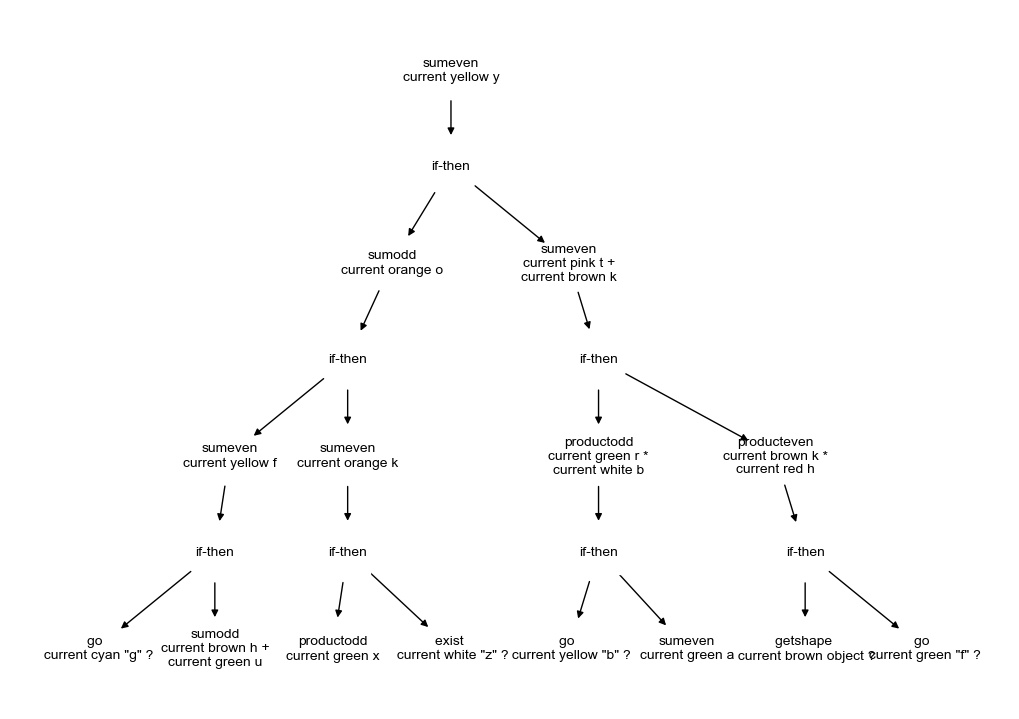

In [20]:
task_graph = taskgen.TaskGraph(starting_operators=config.STARTING_OPS,
                               ending_operators=config.ENDING_OPS,
                               min_depth=7)
plt.figure(figsize=(10,7))
task_graph.plot_graph()
plt.tight_layout()

## Generate an image that satifies this task graph

Instruction: [ if current yellow y sum is even , then [ if current orange o sum is odd , then [ if current yellow f sum is even , then loc of current cyan g , else current brown h + current green u sum is odd ] , else [ if current orange k sum is even , then current green x product is odd , else current white z exist ] ] , else [ if current pink t + current brown k sum is even , then [ if current green r * current white b product is odd , then loc of current yellow b , else current green a sum is even ] , else [ if current brown k * current red h product is even , then shape of current brown object , else loc of current green f ] ] ]
Target output: (1, 0)


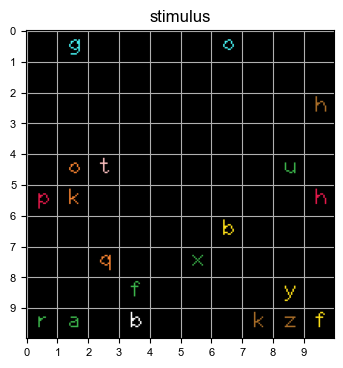

In [21]:
max_distractors = 3

task_ex = taskgen.MetaTask(task_graph)
objset = task_ex.generate_objset(n_distractor=max_distractors)
targets = task_ex.get_target(objset)

print('Instruction:', task_ex)
print('Target output:', targets[0])
img_array = objset.create_img()

plt.figure(figsize=(4,4))
plt.title('stimulus',fontsize=12,fontname='Arial')
plt.imshow(np.asarray(img_array[:,:,:,0],dtype='int16'))
plt.grid()
plt.xticks(np.arange(0,200,20),np.arange(0,10),fontsize=8,fontname='Arial');
plt.yticks(np.arange(0,200,20),np.arange(0,10),fontsize=8,fontname='Arial');
# plt.savefig(figurename + '_stimuli.png',transparent=True,dpi=300)

## Generate an image that satifies this task graph, but add more distractors

Instruction: [ if current yellow y sum is even , then [ if current orange o sum is odd , then [ if current yellow f sum is even , then loc of current cyan g , else current brown h + current green u sum is odd ] , else [ if current orange k sum is even , then current green x product is odd , else current white z exist ] ] , else [ if current pink t + current brown k sum is even , then [ if current green r * current white b product is odd , then loc of current yellow b , else current green a sum is even ] , else [ if current brown k * current red h product is even , then shape of current brown object , else loc of current green f ] ] ]
Target output: True


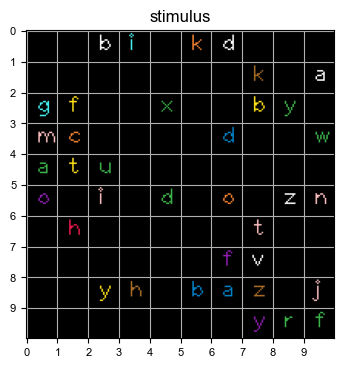

In [22]:
max_distractors = 30
task_ex = taskgen.MetaTask(task_graph)
objset = task_ex.generate_objset(n_distractor=max_distractors)
targets = task_ex.get_target(objset)

print('Instruction:', task_ex)
print('Target output:', targets[0])
img_array = objset.create_img()

plt.figure(figsize=(4,4))
plt.title('stimulus',fontsize=12,fontname='Arial')
plt.imshow(np.asarray(img_array[:,:,:,0],dtype='int16'))
plt.grid()
plt.xticks(np.arange(0,200,20),np.arange(0,10),fontsize=8,fontname='Arial');
plt.yticks(np.arange(0,200,20),np.arange(0,10),fontsize=8,fontname='Arial');
# plt.savefig(figurename + '_stimuli.png',transparent=True,dpi=300)